In [48]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [50]:
train_dir = 'C:/Users/shubh/OneDrive/Desktop/DATASET/TRAIN' #directory with training images
test_dir = 'C:/Users/shubh/OneDrive/Desktop/DATASET/TEST' #directory with testing images

In [51]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [52]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (75,75),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (75,75),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 739 images belonging to 5 classes.
Found 88 images belonging to 5 classes.


In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(75, 75, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [54]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
epochs = 50  
batch_size = 16

In [55]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 75, 75, 64)        1792      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 18, 18, 256)      

In [56]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [57]:
# from tensorflow.keras.callbacks import ModelCheckpoint
# path = "C:/Users/shubh/OneDrive/Desktop/model2/weights-{epoch:02d}.hdf5"
# checkpoint = ModelCheckpoint(path, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq=1)
# callback = [checkpoint]

In [58]:
# history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator,callbacks = callback)
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)

Epoch 1/50
47/47 [==============================] - 27s 554ms/step - loss: 1.1443 - accuracy: 0.5372 - val_loss: 0.3332 - val_accuracy: 0.8864
Epoch 2/50
47/47 [==============================] - 25s 531ms/step - loss: 0.7007 - accuracy: 0.7605 - val_loss: 0.1379 - val_accuracy: 0.9545
Epoch 3/50
47/47 [==============================] - 25s 529ms/step - loss: 0.4949 - accuracy: 0.8241 - val_loss: 0.0756 - val_accuracy: 0.9886
Epoch 4/50
47/47 [==============================] - 25s 531ms/step - loss: 0.3833 - accuracy: 0.8620 - val_loss: 0.0811 - val_accuracy: 0.9773
Epoch 5/50
47/47 [==============================] - 25s 531ms/step - loss: 0.3246 - accuracy: 0.8917 - val_loss: 0.0955 - val_accuracy: 0.9545
Epoch 6/50
47/47 [==============================] - 25s 534ms/step - loss: 0.2621 - accuracy: 0.9202 - val_loss: 0.0391 - val_accuracy: 0.9886
Epoch 7/50
47/47 [==============================] - 25s 536ms/step - loss: 0.1952 - accuracy: 0.9364 - val_loss: 0.0475 - val_accuracy: 0.9773

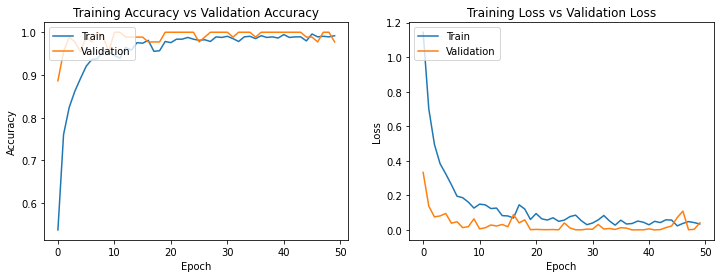

In [59]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()